In [11]:
import os
import re
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

networkx can be installed via: conda install networkx -c conda-forge

In [3]:
# data location
root = r'C:\Users\Algo\Desktop\graph-classification-postech-deeplearning\data' 

In [4]:
#read graph.txt and proc
graph_path = os.path.join(root, 'graph.txt')
e_list = dict()
n_idx = 0
chk = False
with open(graph_path) as f:
    for e in f.readlines():   
        n1, n2 = list(map(int, re.split('\,\s', e)))
        #print(e)
        if n1 == n_idx and chk == False:
            e_list[n1].append(n2)
            chk = True
        elif n2 == n_idx and chk == True:
            chk = False
        elif n1 == n_idx+1 and chk==False:
            n_idx += 1
            e_list[n1] = [n2,]
            chk = True

In [5]:
graph_ind_path = os.path.join(root, 'graph_ind.txt')
graphs = dict()
nodes = dict()
g_idx = 0

with open(graph_ind_path) as f:
    for row in f.readlines():
        node, label = list(map(int, re.split('\,\s', row)))
        if label == g_idx:
            graphs[g_idx].append(node)
            nodes[node] = g_idx
        elif label == g_idx+1:
            g_idx += 1
            graphs[g_idx] = [node,]
            nodes[node] = g_idx

In [6]:
train_path = os.path.join(root, 'train.txt')
GT = dict()

with open(train_path) as f:
    for line in f.readlines():
        g_no, label = list(map(int, line.split()))
        GT[g_no] = label
        #print(g_no, label)

3028 2
2975 2
327 1
3863 3
1828 1
2677 2
975 1
1182 1
1208 1
3404 3
1052 1
2617 2
2380 1
1484 1
3845 3
1877 1
1095 1
2261 1
1209 1
930 1
4332 3
938 1
3633 3
300 1
134 1
3556 3
1535 1
2364 1
3110 2
228 1
1255 1
902 1
2002 1
1992 1
3586 3
2844 2
386 1
1202 1
4241 3
3515 3
3904 3
1200 1
3560 3
979 1
1885 1
2101 1
2147 1
4091 3
2381 1
430 1
314 1
1411 1
236 1
1016 1
3175 2
220 1
907 1
26 1
308 1
898 1
2160 1
3858 3
1806 1
4588 3
2837 2
4318 3
1637 1
4324 3
3792 3
4246 3
3522 3
1777 1
3174 2
2738 2
3508 3
4613 3
3761 3
1650 1
3435 3
4140 3
4679 3
4446 3
3507 3
1401 1
4061 3
3625 3
45 1
4565 3
4017 3
3641 3
4551 3
1492 1
2725 2
3023 2
971 1
306 1
1159 1
610 1
2069 1
614 1
4119 3
408 1
2806 2
535 1
1589 1
3957 3
752 1
1037 1
2304 1
2879 2
4641 3
2642 2
2024 1
1739 1
117 1
2300 1
1750 1
3436 3
2162 1
109 1
8 1
4608 3
1033 1
2293 1
4509 3
773 1
422 1
2856 2
537 1
3695 3
4345 3
1060 1
1646 1
4097 3
489 1
3925 3
1195 1
4560 3
3701 3
441 1
333 1
4272 3
403 1
2892 2
1864 1
2274 1
4109 3
2639 2
59 1

425 1
1434 1
940 1
3453 3
3602 3
3774 3
3530 3
560 1
2186 1
4020 3
1325 1
2148 1
119 1
548 1
1547 1
4448 3
4685 3
2028 1
232 1
2915 2
4519 3
1599 1
834 1
4214 3
2088 1
4488 3
2079 1
1590 1
3663 3
3618 3
3037 2
2348 1
4671 3
3587 3
162 1
4607 3
4296 3
1848 1
78 1
257 1
3944 3
2663 2
4144 3
3537 3
659 1
2342 1
4383 3
4669 3
3765 3
4073 3
175 1
2914 2
2864 2
4361 3
2205 1
1640 1
3683 3
421 1
1587 1
2203 1
36 1
3730 3
2620 2
3946 3
358 1
1029 1
605 1
2135 1
76 1
133 1
2298 1
157 1
4403 3
1825 1
4405 3
1371 1
140 1
1083 1
4056 3
459 1
837 1
1910 1
426 1
2083 1
3615 3
2094 1
3510 3
4736 3
2926 2
486 1
2294 1
2860 2
2070 1
2910 2
2141 1
4541 3
3820 3
3101 2
143 1
4664 3
622 1
4143 3
1369 1
1803 1
507 1
4518 3
2882 2
1937 1
108 1
3721 3
4347 3
877 1
1896 1
3460 3
4278 3
3798 3
3899 3
1909 1
2889 2
3546 3
2727 2
3494 3
4327 3
4349 3
939 1
4000 3
4132 3
302 1
1207 1
1630 1
4174 3
1041 1
418 1
3137 2
3796 3
310 1
4516 3
3405 3
4094 3
1136 1
1642 1
2924 2
2399 1
200 1
1641 1
4317 3
2326 1
805 1
28

4794 3
3896 3
3738 3
2742 2
4646 3
4379 3
2086 1
1078 1
3751 3
4340 3
1177 1
1479 1
1962 1
2041 1
4777 3
710 1
3955 3
2800 2
534 1
765 1
3848 3
339 1
4206 3
4427 3
3514 3
2341 1
4326 3
3598 3
1330 1
362 1
3755 3
2034 1
774 1
4271 3
3419 3
4797 3
2114 1
4373 3
82 1
1336 1
4362 3
4231 3
144 1
2778 2
575 1
2077 1
2799 2
106 1
3735 3
142 1
2923 2
2385 1
1287 1
3973 3
3152 2
4032 3
4781 3
1596 1
1810 1
3035 2
920 1
2643 2
2155 1
4436 3
2291 1
3676 3
4259 3
3396 3
2684 2
3872 3
2231 1
1348 1
962 1
2017 1
9 1
4154 3
4576 3
3657 3
2255 1
1071 1
1499 1
4639 3
3801 3
3590 3
2651 2
2097 1
3698 3
2618 2
2025 1
2367 1
3938 3
483 1
2665 2
4411 3
225 1
4367 3
2991 2
2314 1
4329 3
511 1
2377 1
3809 3
2880 2
2005 1
3913 3
598 1
393 1
1967 1
1571 1
4684 3
1143 1
3462 3
303 1
3704 3
2648 2
665 1
3606 3
357 1
3558 3
4123 3
126 1
4346 3
1295 1
4609 3
3450 3
510 1
985 1
3776 3
2868 2
675 1
916 1
3443 3
4739 3
1197 1
1960 1
3574 3
1718 1
1212 1
3452 3
3385 3
617 1
1097 1
3688 3
4186 3
4357 3
4675 3
2750 2
28

***********graph info***********
graph no:  3028
graph label:  2
Graph Info:
 Name: G
Type: Graph
Number of nodes: 60
Number of edges: 480
Average degree:  16.0000


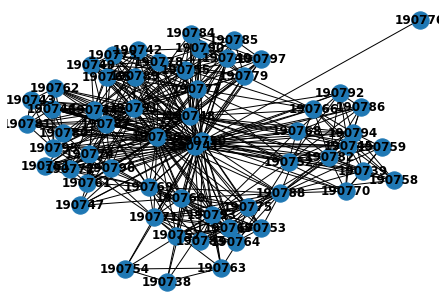

***********graph info***********
graph no:  2975
graph label:  2
Graph Info:
 Name: G
Type: Graph
Number of nodes: 35
Number of edges: 90
Average degree:   5.1429


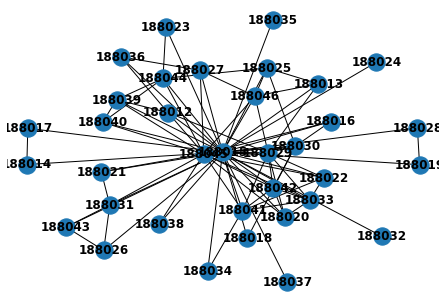

***********graph info***********
graph no:  327
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 52
Number of edges: 1095
Average degree:  42.1154


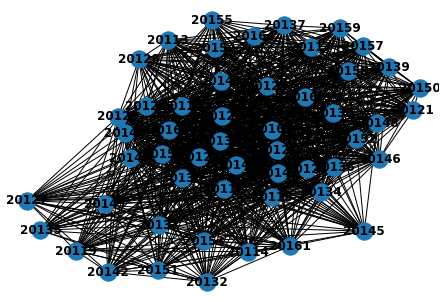

***********graph info***********
graph no:  3863
graph label:  3
Graph Info:
 Name: G
Type: Graph
Number of nodes: 99
Number of edges: 4852
Average degree:  98.0202


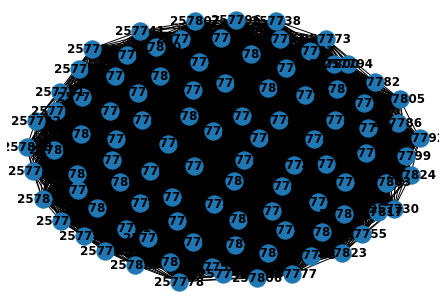

***********graph info***********
graph no:  1828
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 33
Number of edges: 286
Average degree:  17.3333


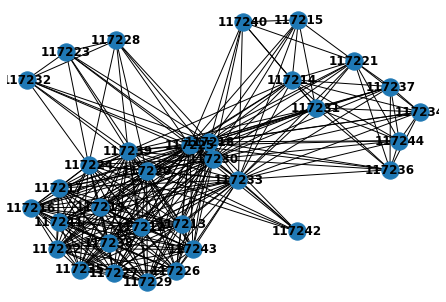

***********graph info***********
graph no:  2677
graph label:  2
Graph Info:
 Name: G
Type: Graph
Number of nodes: 32
Number of edges: 255
Average degree:  15.9375


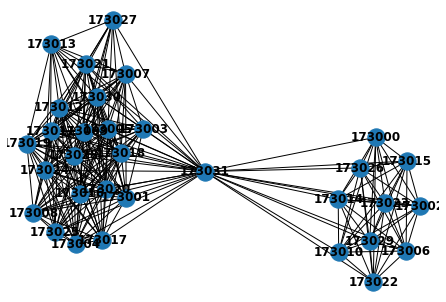

***********graph info***********
graph no:  975
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 33
Number of edges: 322
Average degree:  19.5152


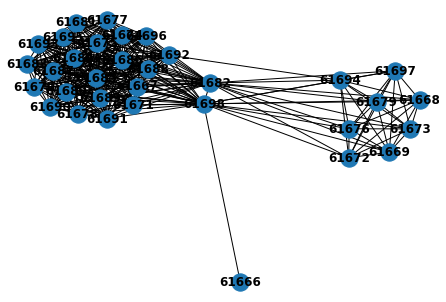

***********graph info***********
graph no:  1182
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 81
Number of edges: 1123
Average degree:  27.7284


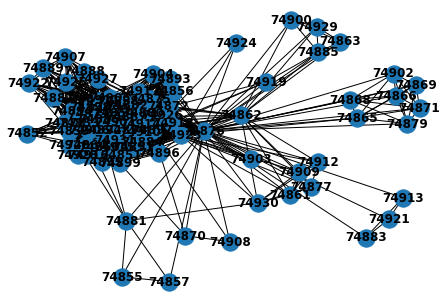

***********graph info***********
graph no:  1208
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 55
Number of edges: 395
Average degree:  14.3636


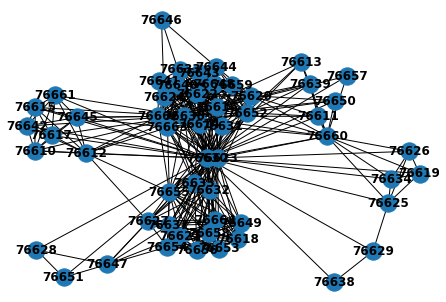

***********graph info***********
graph no:  3404
graph label:  3
Graph Info:
 Name: G
Type: Graph
Number of nodes: 45
Number of edges: 527
Average degree:  23.4222


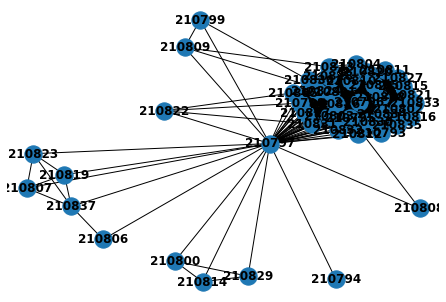

***********graph info***********
graph no:  1052
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 40
Number of edges: 374
Average degree:  18.7000


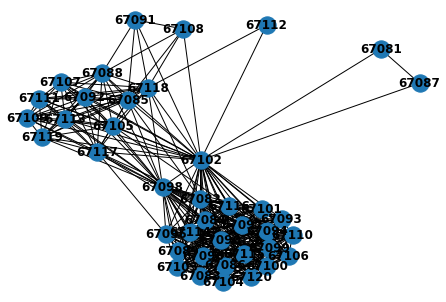

***********graph info***********
graph no:  2617
graph label:  2
Graph Info:
 Name: G
Type: Graph
Number of nodes: 33
Number of edges: 146
Average degree:   8.8485


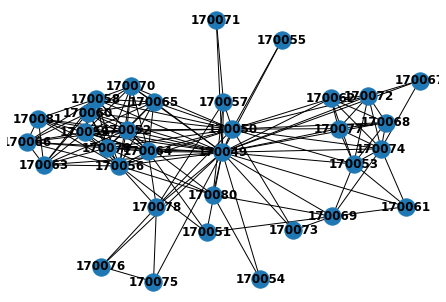

***********graph info***********
graph no:  2380
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 48
Number of edges: 252
Average degree:  10.5000


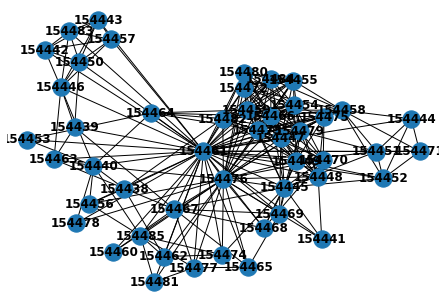

***********graph info***********
graph no:  1484
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 34
Number of edges: 109
Average degree:   6.4118


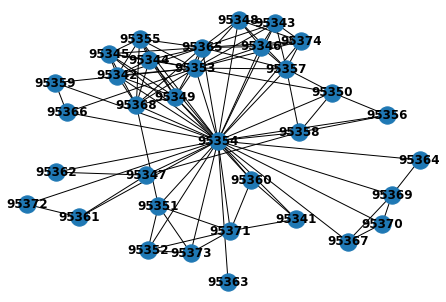

***********graph info***********
graph no:  3845
graph label:  3
Graph Info:
 Name: G
Type: Graph
Number of nodes: 32
Number of edges: 496
Average degree:  31.0000


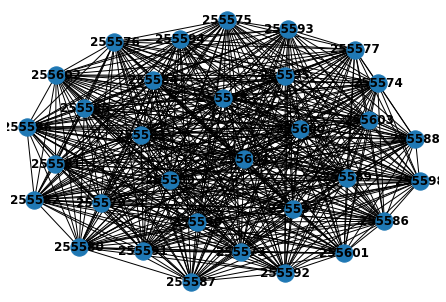

***********graph info***********
graph no:  1877
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 134
Number of edges: 1578
Average degree:  23.5522


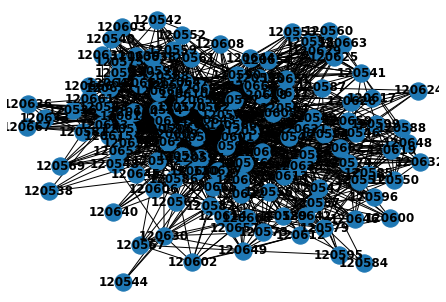

***********graph info***********
graph no:  1095
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 43
Number of edges: 891
Average degree:  41.4419


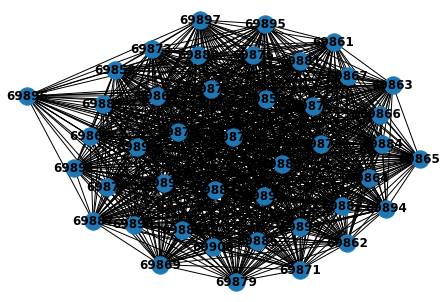

***********graph info***********
graph no:  2261
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 42
Number of edges: 618
Average degree:  29.4286


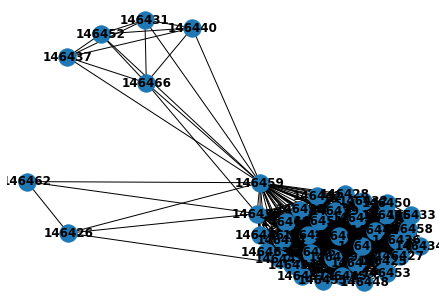

***********graph info***********
graph no:  1209
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 41
Number of edges: 523
Average degree:  25.5122


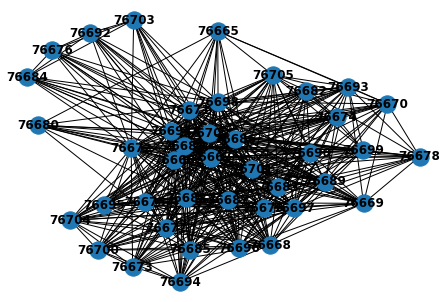

***********graph info***********
graph no:  930
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 50
Number of edges: 497
Average degree:  19.8800


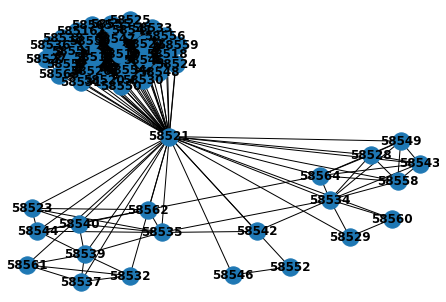

***********graph info***********
graph no:  4332
graph label:  3
Graph Info:
 Name: G
Type: Graph
Number of nodes: 355
Number of edges: 33486
Average degree: 188.6535


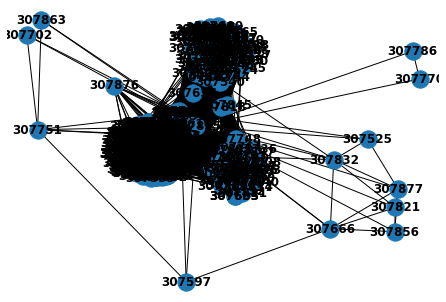

***********graph info***********
graph no:  938
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 55
Number of edges: 1200
Average degree:  43.6364


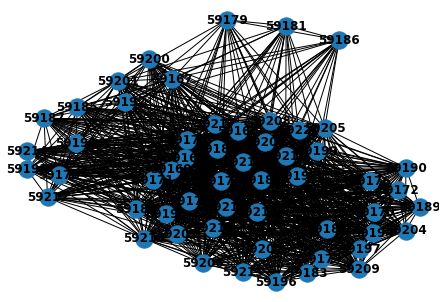

***********graph info***********
graph no:  3633
graph label:  3
Graph Info:
 Name: G
Type: Graph
Number of nodes: 32
Number of edges: 496
Average degree:  31.0000


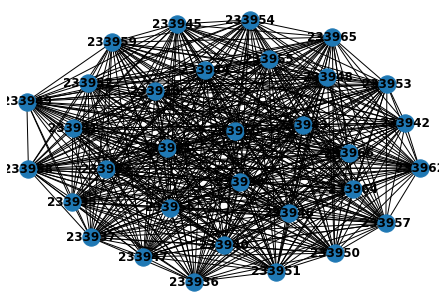

***********graph info***********
graph no:  300
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 46
Number of edges: 939
Average degree:  40.8261


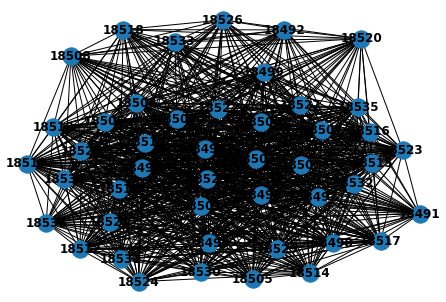

***********graph info***********
graph no:  134
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 106
Number of edges: 793
Average degree:  14.9623


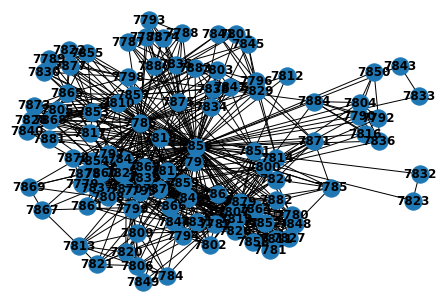

***********graph info***********
graph no:  3556
graph label:  3
Graph Info:
 Name: G
Type: Graph
Number of nodes: 70
Number of edges: 2415
Average degree:  69.0000


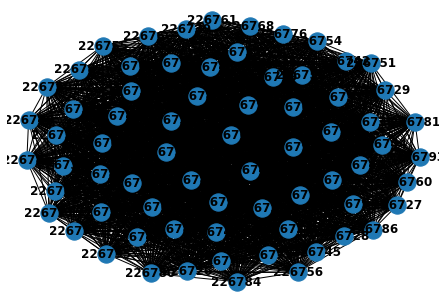

***********graph info***********
graph no:  1535
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 36
Number of edges: 452
Average degree:  25.1111


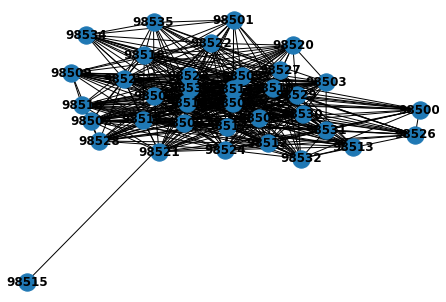

***********graph info***********
graph no:  2364
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 51
Number of edges: 1043
Average degree:  40.9020


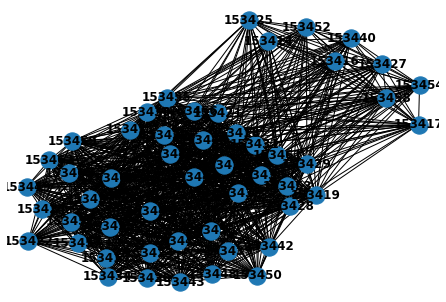

***********graph info***********
graph no:  3110
graph label:  2
Graph Info:
 Name: G
Type: Graph
Number of nodes: 35
Number of edges: 181
Average degree:  10.3429


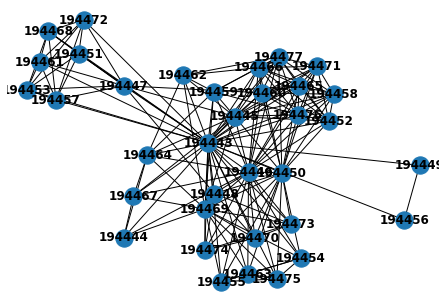

***********graph info***********
graph no:  228
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 33
Number of edges: 321
Average degree:  19.4545


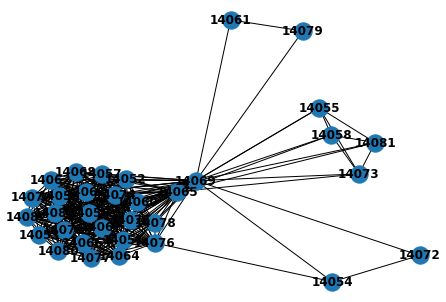

***********graph info***********
graph no:  1255
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 38
Number of edges: 138
Average degree:   7.2632


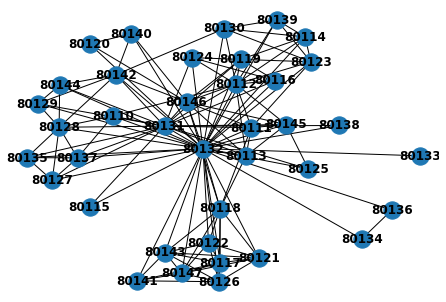

***********graph info***********
graph no:  902
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 49
Number of edges: 593
Average degree:  24.2041


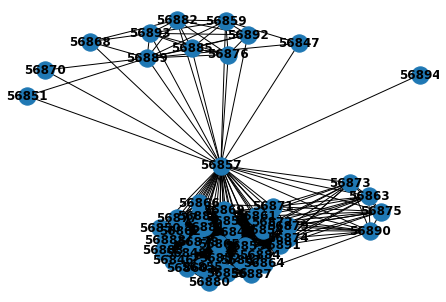

***********graph info***********
graph no:  2002
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 163
Number of edges: 1933
Average degree:  23.7178


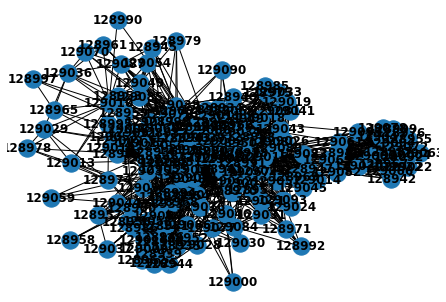

***********graph info***********
graph no:  1992
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 40
Number of edges: 147
Average degree:   7.3500


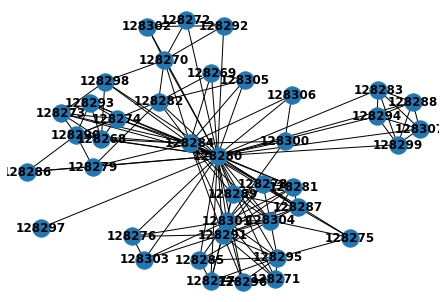

***********graph info***********
graph no:  3586
graph label:  3
Graph Info:
 Name: G
Type: Graph
Number of nodes: 47
Number of edges: 1081
Average degree:  46.0000


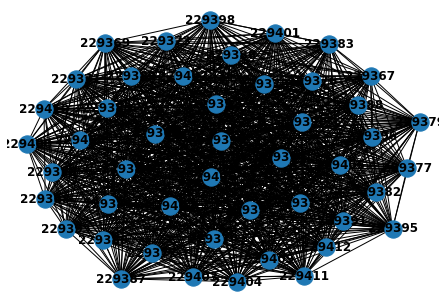

***********graph info***********
graph no:  2844
graph label:  2
Graph Info:
 Name: G
Type: Graph
Number of nodes: 32
Number of edges: 117
Average degree:   7.3125


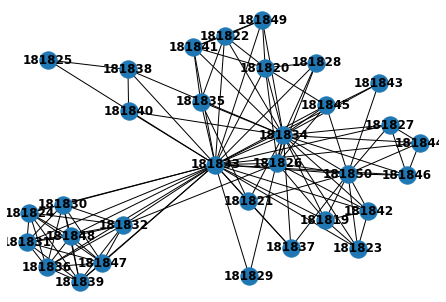

***********graph info***********
graph no:  386
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 41
Number of edges: 477
Average degree:  23.2683


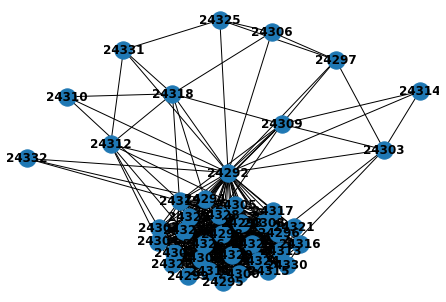

***********graph info***********
graph no:  1202
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 52
Number of edges: 355
Average degree:  13.6538


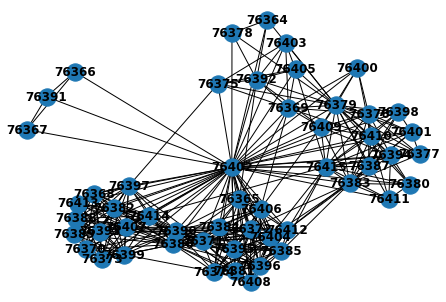

***********graph info***********
graph no:  4241
graph label:  3
Graph Info:
 Name: G
Type: Graph
Number of nodes: 50
Number of edges: 1044
Average degree:  41.7600


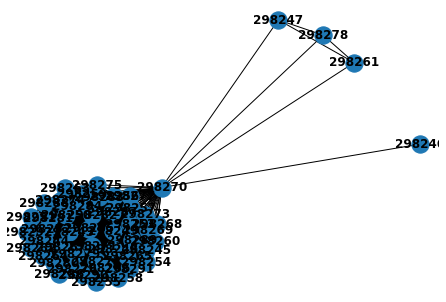

***********graph info***********
graph no:  3515
graph label:  3
Graph Info:
 Name: G
Type: Graph
Number of nodes: 35
Number of edges: 267
Average degree:  15.2571


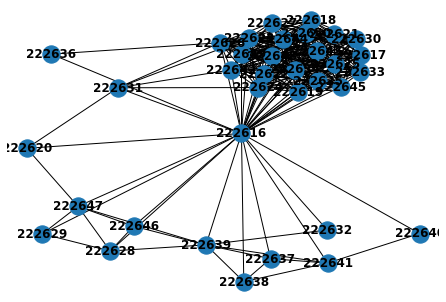

***********graph info***********
graph no:  3904
graph label:  3
Graph Info:
 Name: G
Type: Graph
Number of nodes: 42
Number of edges: 861
Average degree:  41.0000


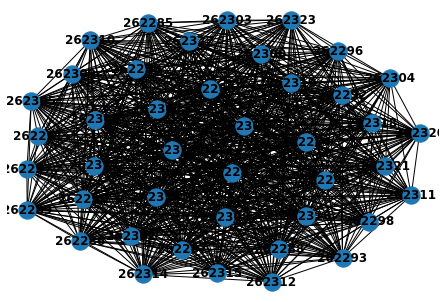

***********graph info***********
graph no:  1200
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 108
Number of edges: 841
Average degree:  15.5741


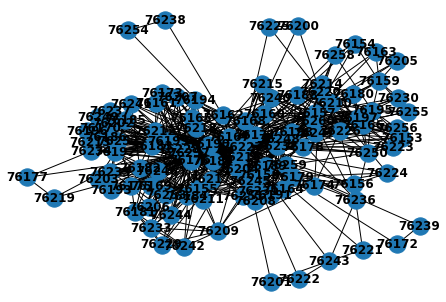

***********graph info***********
graph no:  3560
graph label:  3
Graph Info:
 Name: G
Type: Graph
Number of nodes: 51
Number of edges: 1104
Average degree:  43.2941


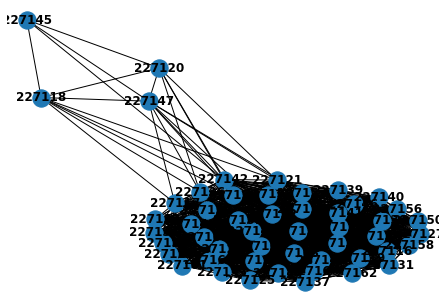

***********graph info***********
graph no:  979
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 36
Number of edges: 433
Average degree:  24.0556


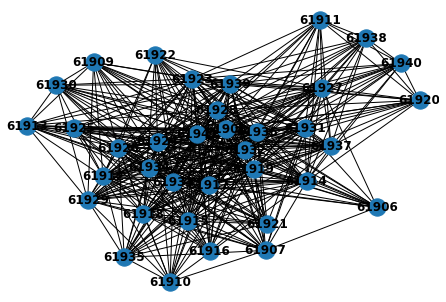

***********graph info***********
graph no:  1885
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 133
Number of edges: 1386
Average degree:  20.8421


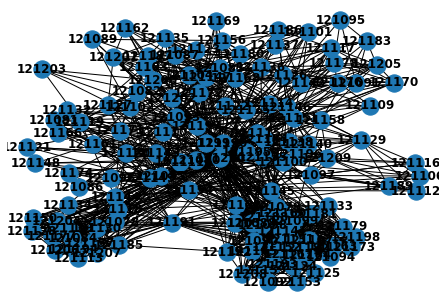

***********graph info***********
graph no:  2101
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 60
Number of edges: 908
Average degree:  30.2667


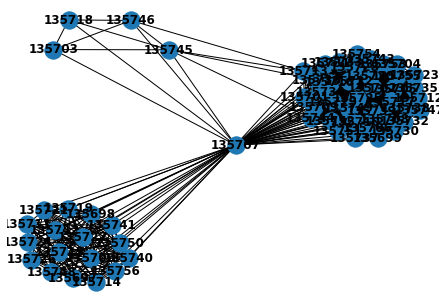

***********graph info***********
graph no:  2147
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 34
Number of edges: 147
Average degree:   8.6471


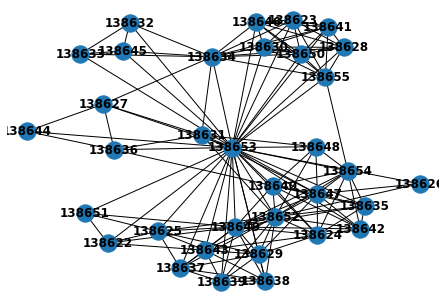

***********graph info***********
graph no:  4091
graph label:  3
Graph Info:
 Name: G
Type: Graph
Number of nodes: 283
Number of edges: 30064
Average degree: 212.4664


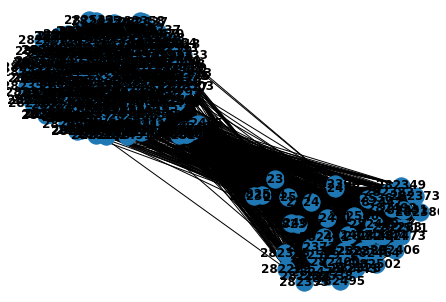

***********graph info***********
graph no:  2381
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 142
Number of edges: 1763
Average degree:  24.8310


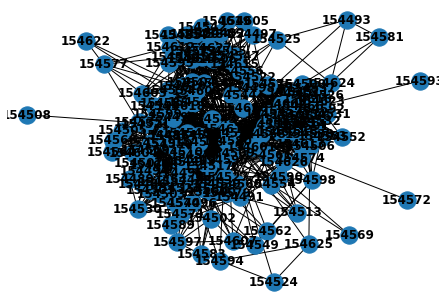

***********graph info***********
graph no:  430
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 37
Number of edges: 666
Average degree:  36.0000


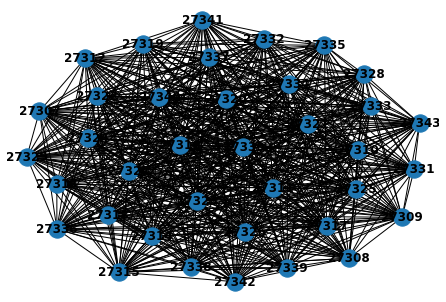

***********graph info***********
graph no:  314
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 40
Number of edges: 228
Average degree:  11.4000


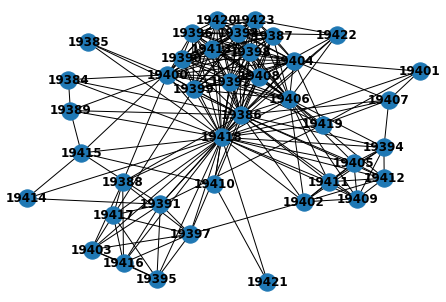

***********graph info***********
graph no:  1411
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 94
Number of edges: 1304
Average degree:  27.7447


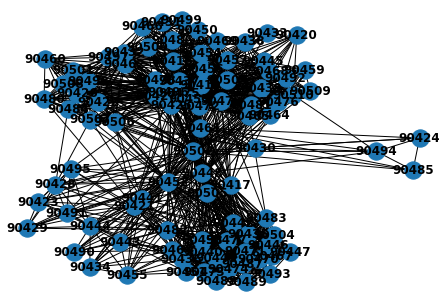

***********graph info***********
graph no:  236
graph label:  1
Graph Info:
 Name: G
Type: Graph
Number of nodes: 51
Number of edges: 1179
Average degree:  46.2353


KeyboardInterrupt: 

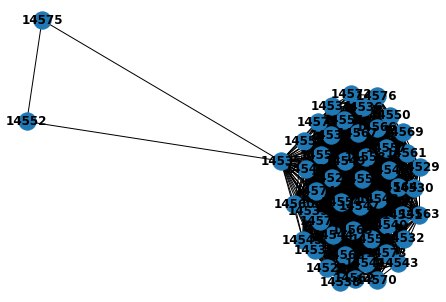

In [13]:
#create a directory to save figures
fig_path = os.path.join(root, 'fig')
if not os.path.exists(fig_path):
    os.mkdir(fig_path)

for i in GT.keys():
    #Initialize the graph
    G = nx.Graph(name='G')

    #Create nodes
    #In this example, the graph will consist of 6 nodes.
    #Each node is assigned node feature which corresponds to the node name

    print('***********graph info***********')
    print('graph no: ', i)
    print('graph label: ', GT[i])


    for node in graphs[i]:
        G.add_node(node, name=node)


    #Define the edges and the edges to the graph
    edges = []
    for n1 in graphs[i]:
        for n2 in e_list[n1]:
            edges.append((n1, n2))

    G.add_edges_from(edges)

    #See graph info
    print('Graph Info:\n', nx.info(G))

    #Inspect the node features
    #print('\nGraph Nodes: ', G.nodes.data())
    
    #Plot the graph
    nx.draw(G, with_labels=True, font_weight='bold')
    
    #save figures
    plt.savefig(os.path.join(fig_path, 'garph_'+str(i)+'_label_'+str(GT[i])+'.png'))
    plt.show()